# Analisi ospedalizzati


In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax,auto_grid_shape


import plotly.express as px
import plotly.graph_objects as go

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [2]:
# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

# grid shape
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

## Lettura dati

In [3]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
posti_ti_covid=pkl.load(infile)
posti_ti_antecovid=pkl.load(infile)
posti_ti_stimati=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 952
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2022-10-02T17:00:00


### Inserimento di eventi notevoli riferiti a date

In [4]:
lockdown={'data':'2020-03-10',
          'id_giorno':15,
          'desc':'Lockdown'}

scuole_chiuse={'data':'2020-03-04',
               'id_giorno':9,
               'desc':'Scuole chiuse'}

fase_2={'data':'2020-05-04',
               'id_giorno':71,
               'desc':'Fase2'}


eventi=[scuole_chiuse,lockdown, fase_2]

## Grafici Nazionali

## Trend del totale dei positivi vs ospedalizzati di vario genere

### Italia

In [5]:
fig,ax=plt.subplots(1,4,sharey=False,figsize=(15,5))
fig.suptitle('Dati giornalieri dal %s al %s'%(giorni[0][0:10],giorni[-1][0:10]), y=1.1,fontsize=17)
fig.tight_layout(pad=2.0)

ax[0].plot(day_counter,trend['totale_positivi']['Italia'],
         'g-', linewidth=3,
         label='Attualmente positivi')
ax[0].set_title('Attualmente positivi')
ax[0].grid()

ax[1].plot(day_counter,trend['totale_ospedalizzati']['Italia'],
         'b-',linewidth=3,
         label='Ospedalizzati')
ax[1].set_title('Ospedalizzati')
ax[1].grid()

ax[2].plot(day_counter,trend['terapia_intensiva']['Italia'],
         'r-',linewidth=3,
         label='Terapia intensiva')
#ax[2].axhline(posti_ti_covid['Italia'],c='k',ls='-',label='Post-COVID')
#ax[2].axhline(posti_ti_antecovid['Italia'],c='k',ls='--',label='Post-COVID')
ax[2].set_title('Terapia intensiva - Oggi %d'%trend['terapia_intensiva']['Italia'][-1])
ax[2].grid()

ax[3].plot(day_counter,trend['deceduti_giornalieri']['Italia'],
         'c-',linewidth=3,
         label='Deceduti')
ax[3].set_title('Deceduti')
ax[3].grid()


In [6]:
fig,ax=plt.subplots(1,figsize=(18,8))
ax.set_yscale('log')
ax.plot(day_counter,trend['totale_positivi']['Italia'],label='Positivi')
ax.plot(day_counter,trend['totale_ospedalizzati']['Italia'],label='Ospedalizzati')
ax.plot(day_counter,trend['terapia_intensiva']['Italia'],label='Terapia intensiva')
ax.plot(day_counter,trend['deceduti_giornalieri']['Italia'],label='Deceduti')
ax.set_xticks(list(range(0,len(day_counter),14)))
ax.set_xticklabels(giorni[list(range(0,len(day_counter),14))],rotation=90)
ax.grid()
ax.legend()

In [7]:
# Terapia intensiva e ospedalizzati su positivi
rate_ti=pd.DataFrame({'Data':giorni,
                      'TI su POSITIVI':100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'],
                      'TI su OSPEDALIZZATI':100*trend['totale_ospedalizzati']['Italia']/trend['totale_positivi']['Italia']})


fig=px.line(data_frame=rate_ti,
           x='Data',
           y=['TI su POSITIVI','TI su OSPEDALIZZATI'])

fig.show()

In [8]:
last_days=60

# Terapia intensiva su positivi
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter[-last_days:],
            (100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'])[-last_days:],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('% Ter. intensiva su positivi')
ax.set_xticks(list(range(day_counter[-last_days],day_counter[-1],7)))
ax.set_xticklabels(giorni[list(range(day_counter[-last_days],day_counter[-1],7))],rotation=90)
ax.set_ylabel('% Terapia intensiva')
# stampo anche a punti il dato raw
ax.plot(day_counter[-last_days:],(100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'])[-last_days:],'b.')
#ax.legend(['Trend','Low','Up','Raw'])
ax.grid()

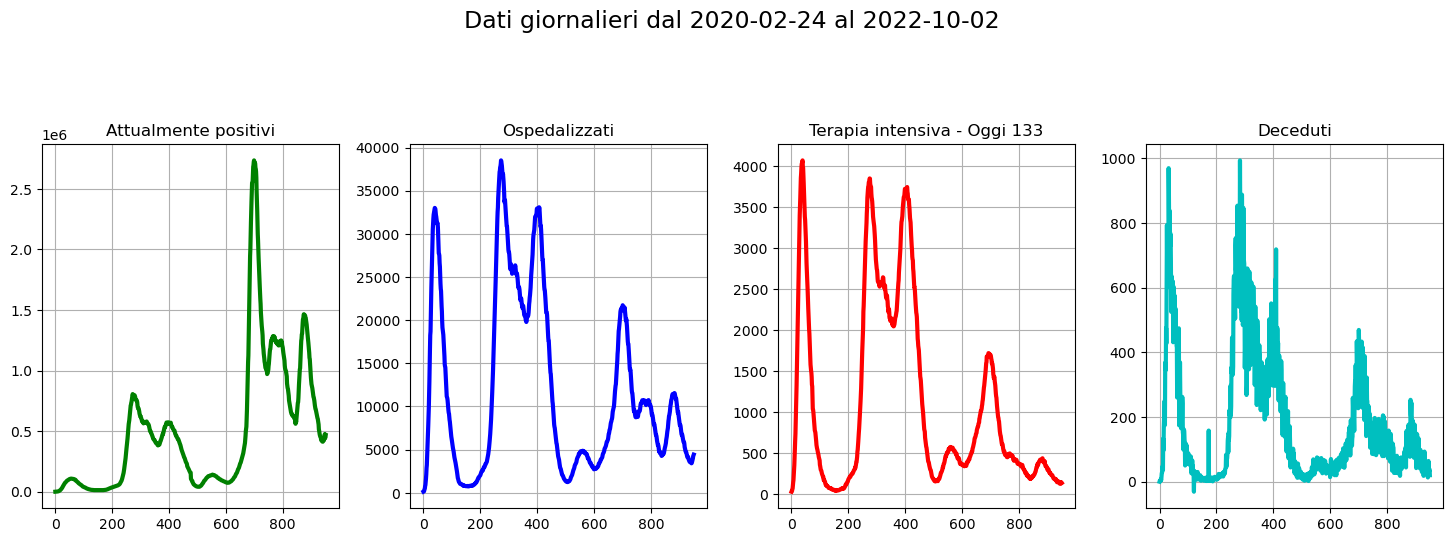

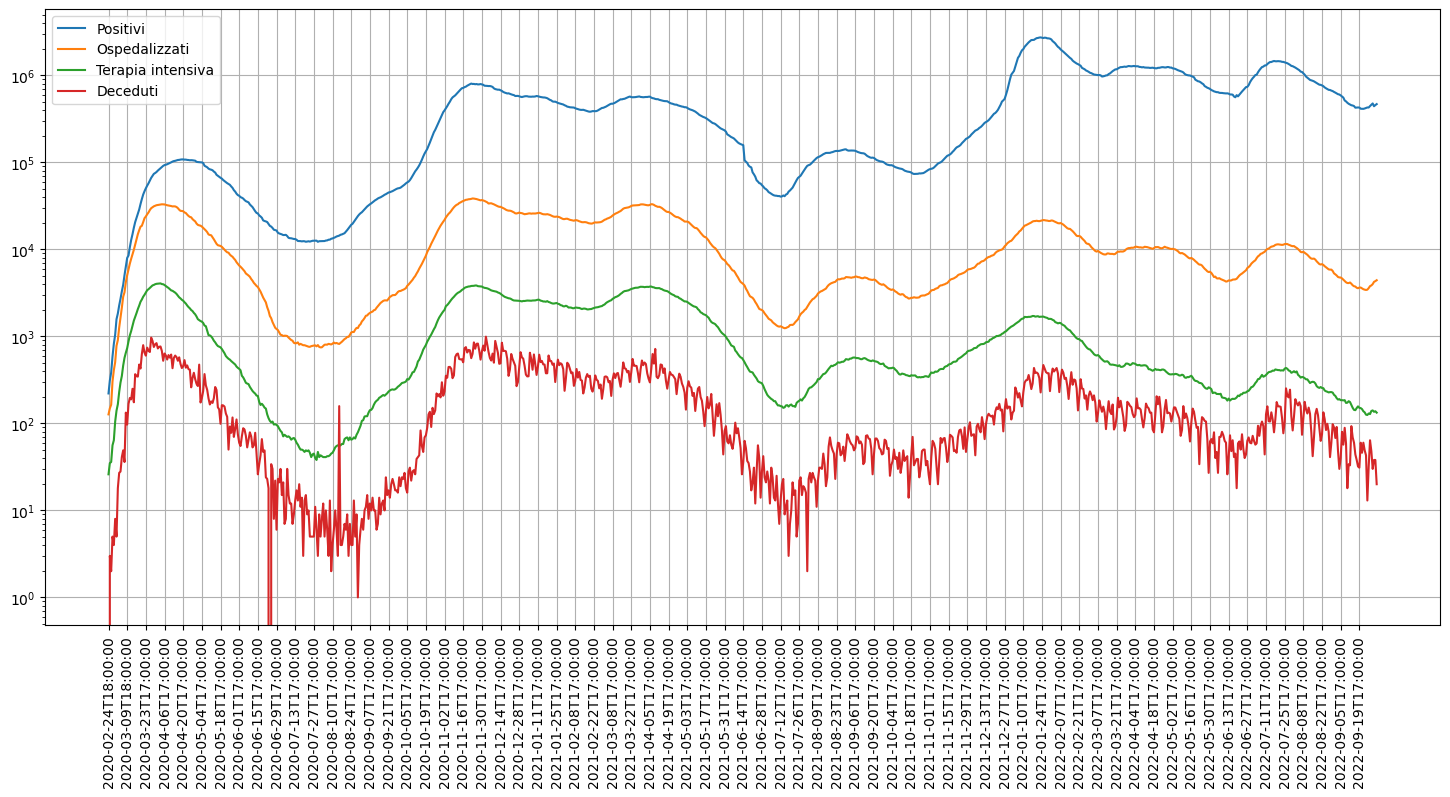

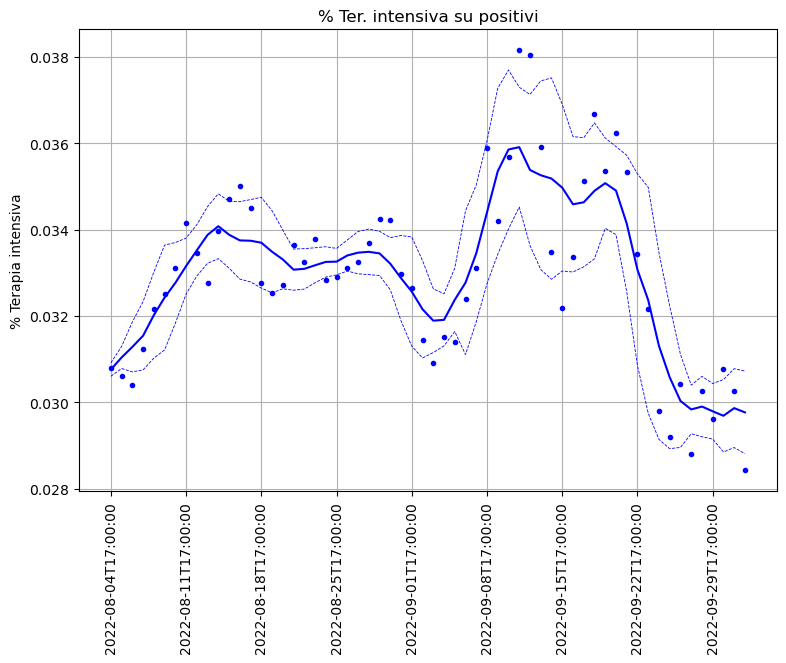

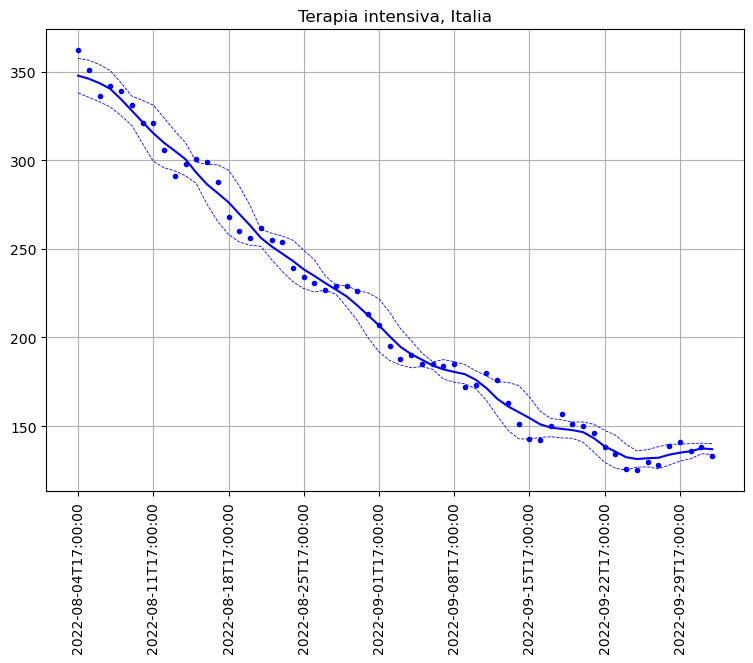

In [9]:
last_days=60

# Terapia intensiva 
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter[-last_days:],
            (trend['terapia_intensiva']['Italia'])[-last_days:],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('Terapia intensiva, Italia')
ax.set_xticks(list(range(day_counter[-last_days],day_counter[-1],7)))
ax.set_xticklabels(giorni[list(range(day_counter[-last_days],day_counter[-1],7))],rotation=90)
#ax.set_ylabel('% Terapia intensiva')
# stampo anche a punti il dato raw
ax.plot(day_counter[-last_days:],(trend['terapia_intensiva']['Italia'])[-last_days:],'b.')
#ax.legend(['Trend','Low','Up','Raw'])
ax.grid()

plt.show()

In [10]:
valid_ingressi_TI=[v for v in trend['ingressi_terapia_intensiva']['Italia'] if not(np.isnan(v))]

fig = go.Figure()


fig.add_trace(go.Scatter(y=trend['ingressi_terapia_intensiva']['Italia'][-len(valid_ingressi_TI):],
                         x=giorni[-len(valid_ingressi_TI):],
                         mode='markers'))

fig.add_trace(go.Scatter(y=moving_function_rev1(trend['ingressi_terapia_intensiva']['Italia'][-len(valid_ingressi_TI):],np.mean,3,3),
                         x=giorni[-len(valid_ingressi_TI):]))

fig.update_layout(
    title="Ingressi terapia intensiva",
    autosize=False,
    showlegend=False,
    width=900,
    height=600
)

fig.show()

## Rapporto fra ingressi in TI e:
- nuovi positivi
- attuatlemnte positivi

In [11]:
rate_inTI_inPOS=trend['ingressi_terapia_intensiva']['Italia']/trend['nuovi_positivi']['Italia']
rate_inTI_totPOS=trend['ingressi_terapia_intensiva']['Italia']/trend['totale_positivi']['Italia']
rate_TI_OSP=trend['terapia_intensiva']['Italia']/trend['totale_ospedalizzati']['Italia']

In [12]:
# rate vs NUOVI POSITIVI
fig = go.Figure()

fig.add_trace(go.Scatter(y=rate_inTI_inPOS[-len(valid_ingressi_TI):],
                         x=giorni[-len(valid_ingressi_TI):],
                         mode='markers'))

fig.add_trace(go.Scatter(y=moving_function_rev1(rate_inTI_inPOS[-len(valid_ingressi_TI):],np.mean,7,3),
                         x=giorni[-len(valid_ingressi_TI):]))
  
fig.update_layout(
    title="Rate ingressi in TI / nuovi positivi, Italia",
    autosize=False,
    showlegend=False,
    width=900,
    height=600
)

fig.show()

# rate vs TOTALE POSITIVI

fig = go.Figure()

fig.add_trace(go.Scatter(y=rate_inTI_totPOS[-len(valid_ingressi_TI):],
                         x=giorni[-len(valid_ingressi_TI):],
                         mode='markers'))

fig.add_trace(go.Scatter(y=moving_function_rev1(rate_inTI_totPOS[-len(valid_ingressi_TI):],np.mean,7,3),
                         x=giorni[-len(valid_ingressi_TI):]))
  
fig.update_layout(
    title="Rate ingressi in TI / totale positivi, Italia",
    autosize=False,
    showlegend=False,
    width=900,
    height=600
)

fig.show()


# rate TI vs TOTALE OSPEDALIZZATI

fig = go.Figure()

fig.add_trace(go.Scatter(y=rate_TI_OSP,
                         x=giorni,
                         mode='markers'))

fig.add_trace(go.Scatter(y=moving_function_rev1(rate_TI_OSP,np.mean,7,3),
                         x=giorni))
  
fig.update_layout(
    title="Rate TI / totale ospedalizzati, Italia",
    autosize=False,
    showlegend=False,
    width=900,
    height=600
)

fig.show()



### Rate decessi giornalieri su totale casi attuali

In [13]:
rate_deceduti_totPOS=trend['deceduti_giornalieri']['Italia']/trend['totale_positivi']['Italia']



fig = go.Figure()

fig.add_trace(go.Scatter(y=rate_deceduti_totPOS,
                         x=giorni,
                         mode='markers'))

fig.add_trace(go.Scatter(y=moving_function_rev1(rate_deceduti_totPOS,np.mean,7,3),
                         x=giorni))
  
fig.update_layout(
    title="Rate decessi / totale positivi, Italia",
    autosize=False,
    showlegend=False,
    width=900,
    height=600
)

fig.show()

calcolo il rapporto fra questo rate in due momenti diversi

In [14]:
# periodo 1
indici1=[i for i in range(len(giorni)) if giorni[i][0:7]=='2021-01']
media_p1=np.mean(rate_deceduti_totPOS[indici1])
# periodo 2
media_p2=np.mean(rate_deceduti_totPOS[-31:])

print('Periodo 1: %.5f'%media_p1)
print('Periodo 2: %.5f'%media_p2)
print('Rapporto: %.3f'%(media_p1/media_p2))

Periodo 1: 0.00087
Periodo 2: 0.00010
Rapporto: 8.566


### Terapia intensiva vs totale attualmente infetti

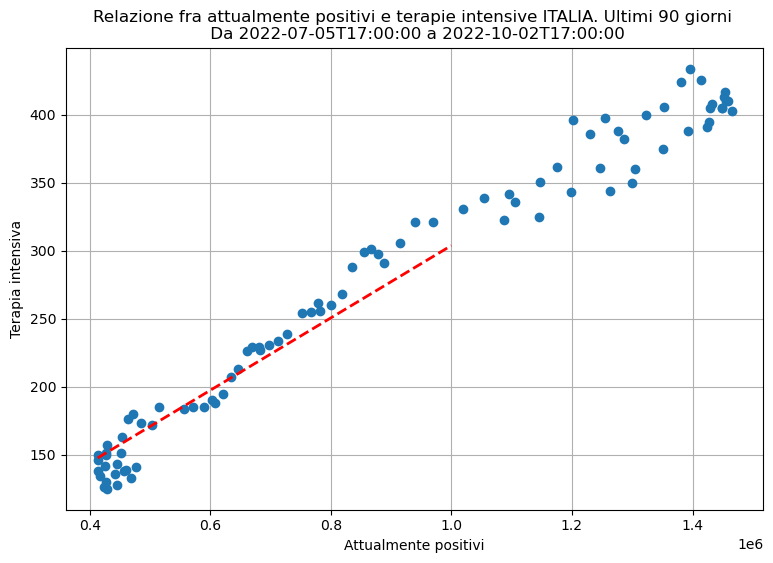

0.9700185671687953
[[0.00026619]]
[37.76949713]


In [15]:
from sklearn.linear_model import LinearRegression

first_day=-90


lmod=LinearRegression()
X=trend['totale_positivi']['Italia'][first_day:].reshape(-1,1)
Y=trend['terapia_intensiva']['Italia'][first_day:].reshape(-1,1)
lmod.fit(X,Y)


Xextended=np.array(range(np.round(np.min(X)).astype(int),1000000,1000)).reshape(-1,1)
Yextended=lmod.predict(Xextended)

fig,ax=plt.subplots(1,figsize=figsize_single)
plt.plot(X,Y,'o')
plt.plot(Xextended,Yextended,'--',color='r',linewidth=2)
plt.title('Relazione fra attualmente positivi e terapie intensive ITALIA. Ultimi %d giorni \n Da %s a %s'%(-first_day,giorni[first_day],giorni[-1]))
plt.xlabel('Attualmente positivi')
plt.ylabel('Terapia intensiva')
plt.grid()
plt.show()


print(lmod.score(X, Y))
print(lmod.coef_)
print(lmod.intercept_)

## Grafici per regione

In [16]:
indicatori_selected=['terapia_intensiva',
                    'totale_ospedalizzati']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_seq[i]].plot(day_counter,trend[indicatore][regione],
                             'b-',linewidth=1.5,label='Reg')
        #ax[grid_seq[i]].plot(day_counter,moving_function_rev1(trend[indicatore][regione],np.mean,2,2),
        #                     'b--',linewidth=2,label='Trend')
        # se analizzo la ti plotto una linea con la max capacità regionale
        if indicatore=='terapia_intensiva':
            ax[grid_seq[i]].axhline(posti_ti_covid[regione],c='g',ls='--',label='Post-COVID')
            ax[grid_seq[i]].axhline(posti_ti_antecovid[regione],c='r',ls='--',label='Pre-COVID')
            ax[grid_seq[i]].axhline(posti_ti_stimati[regione],c='c',ls='--',label='Attuali stimati')
            
            
        ax[grid_seq[i]].set_title(regione)
        ax[grid_seq[i]].legend(loc='upper left')
        ax[grid_seq[i]].grid()
        
    #fig.savefig('PIC_%s.JPG'%indicatore)

## Saturazione terapia intensiva

Posti **COVID**

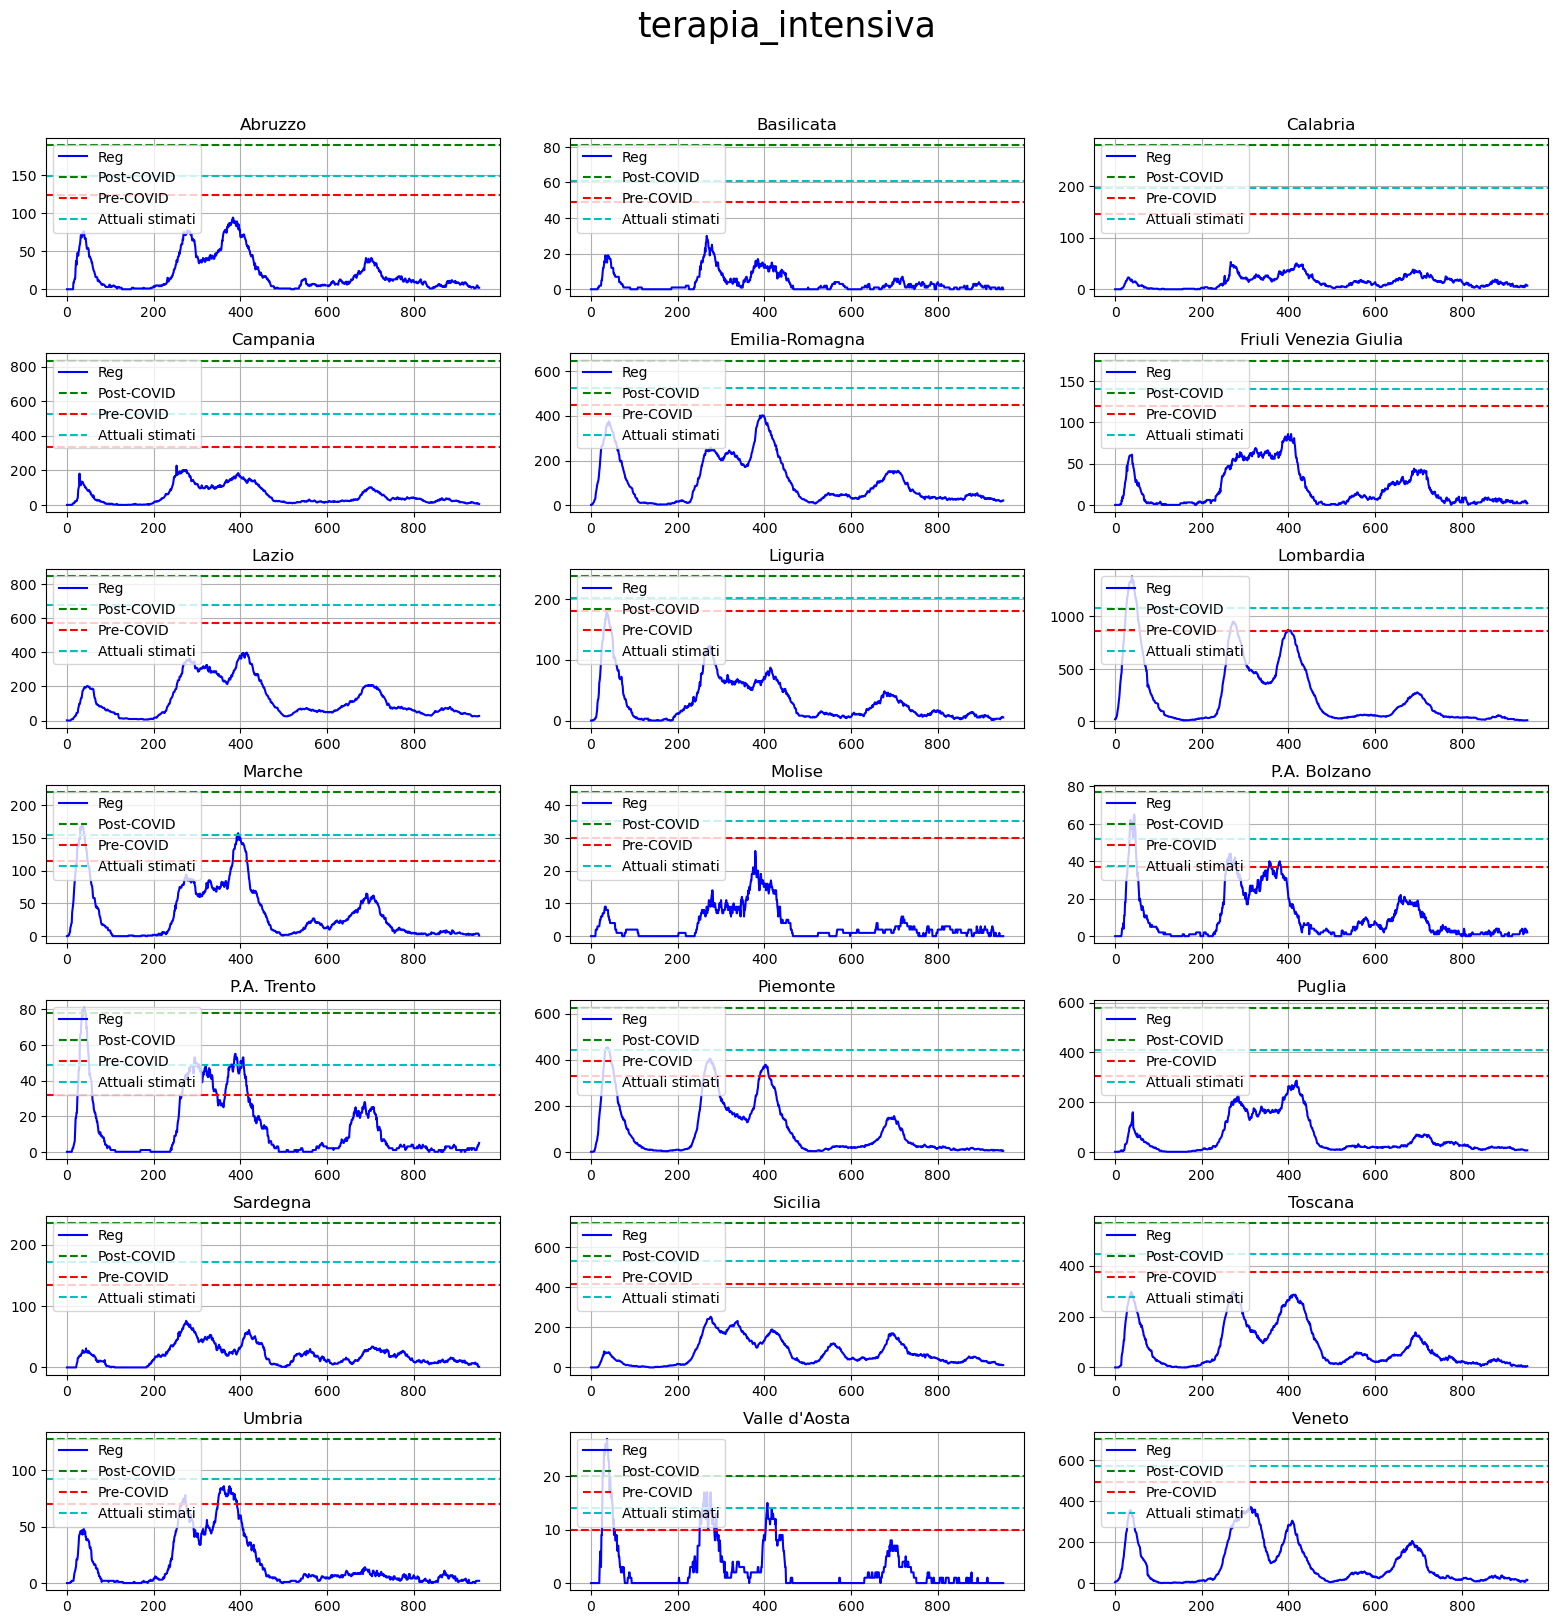

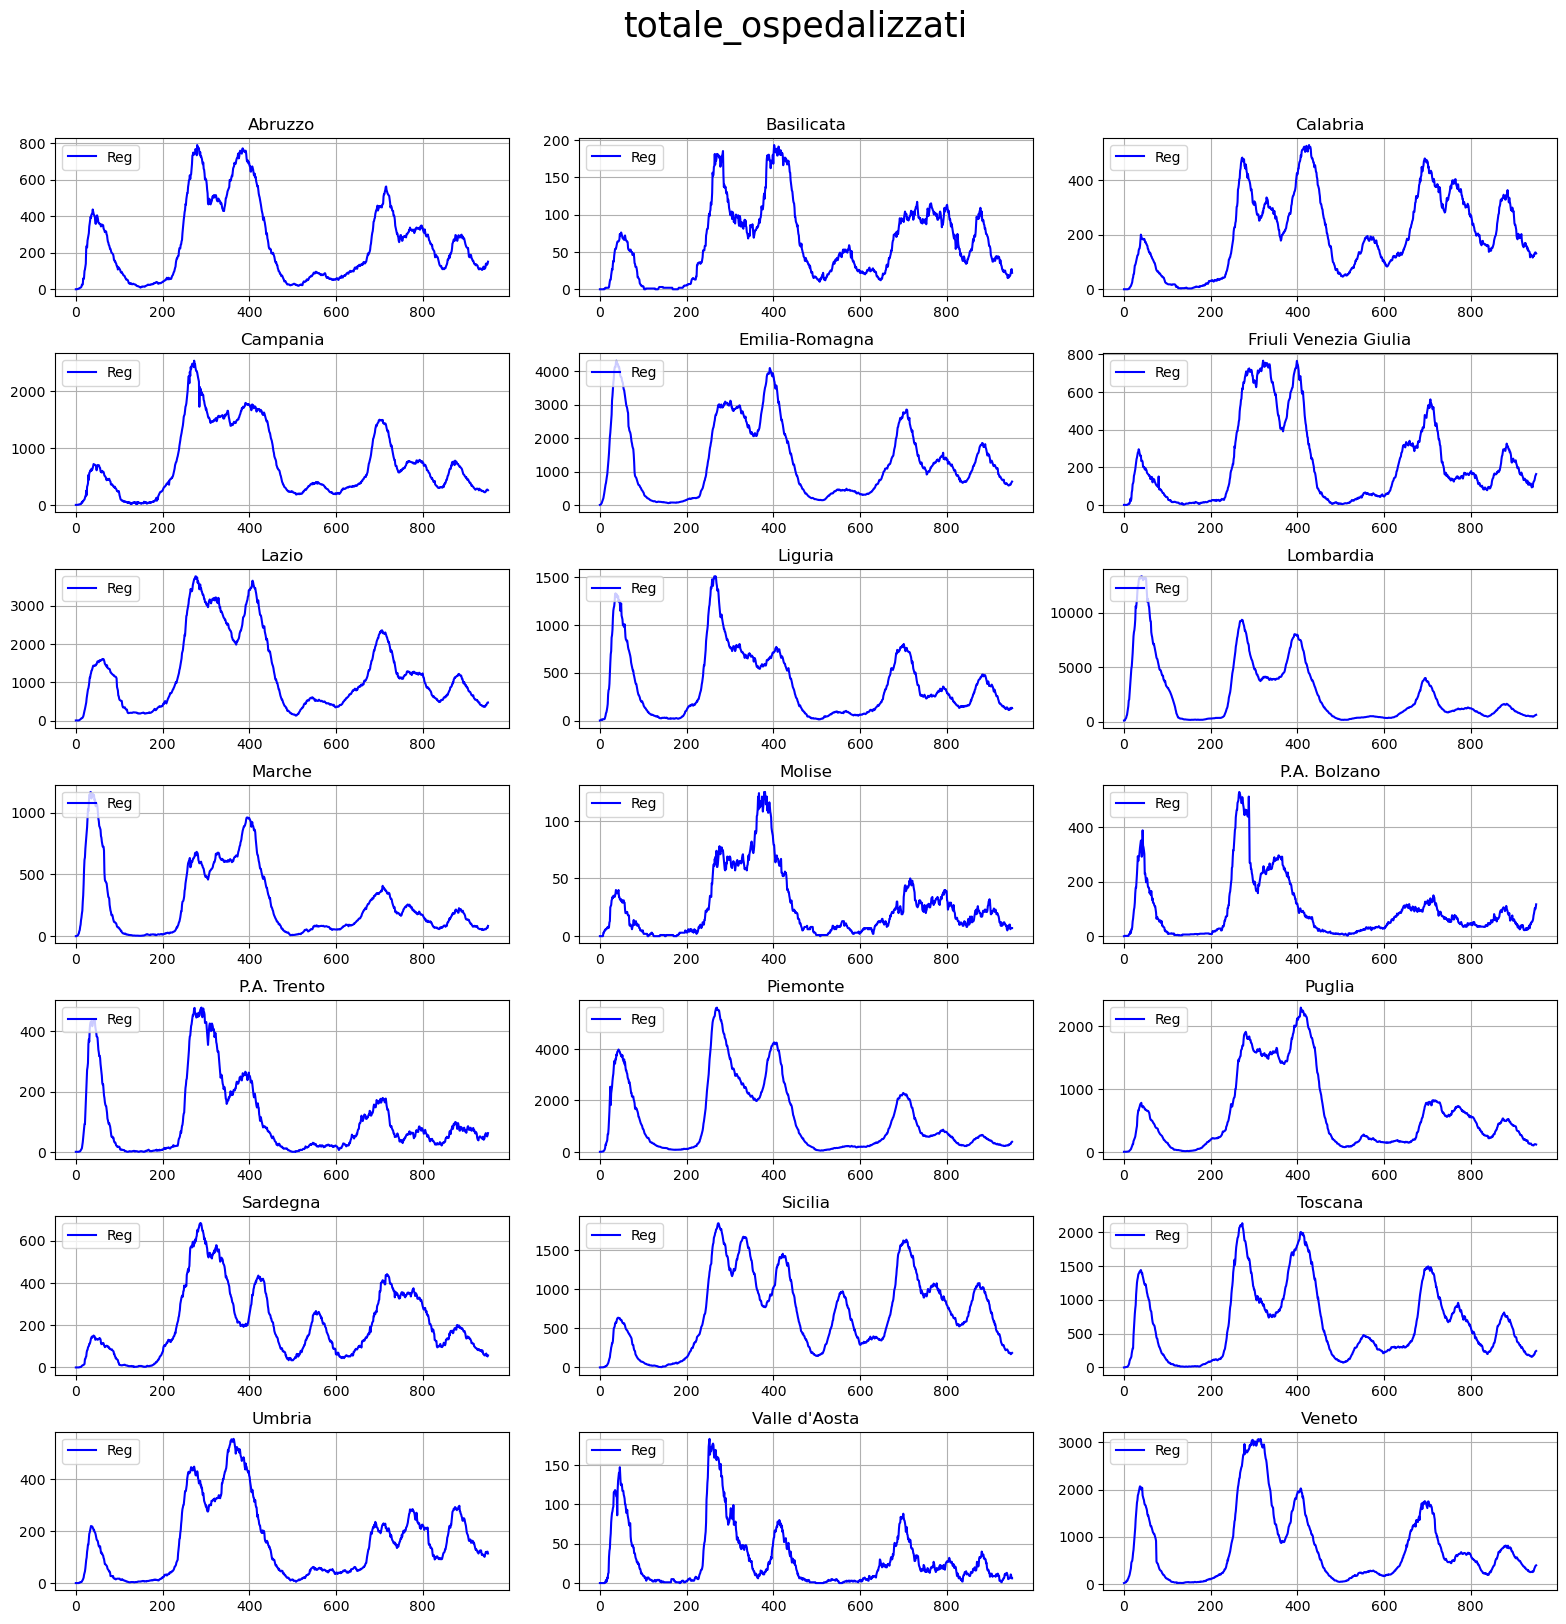

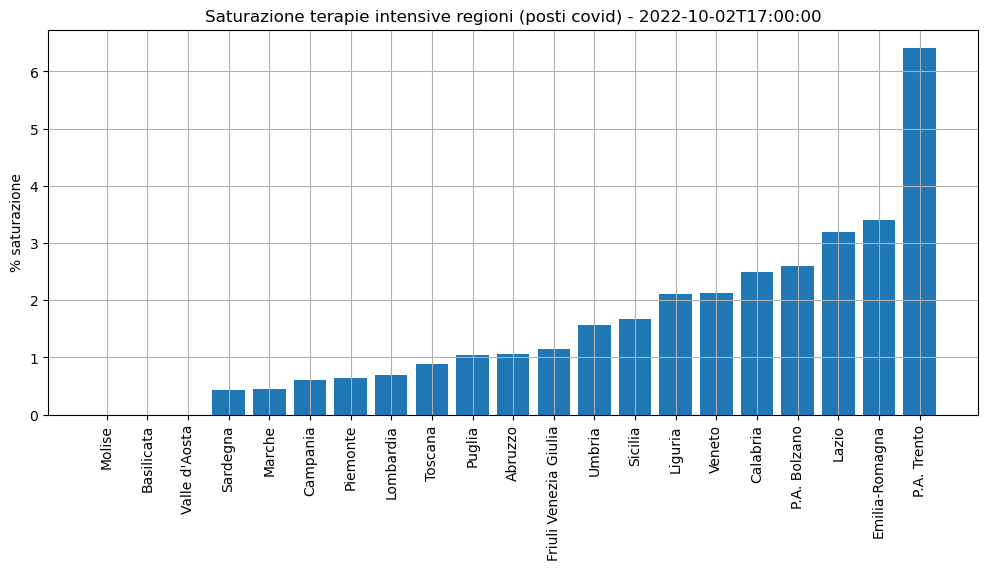

In [17]:
giorno_osservazione=-1

valori=np.array([100*trend['terapia_intensiva'][r][giorno_osservazione]/posti_ti_covid[r] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Saturazione terapie intensive regioni (posti covid) - %s'%giorni[giorno_osservazione])
plt.bar(range(len(regioni)),valori[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('% saturazione')
plt.grid()
plt.show()


Posti **pre-COVID**

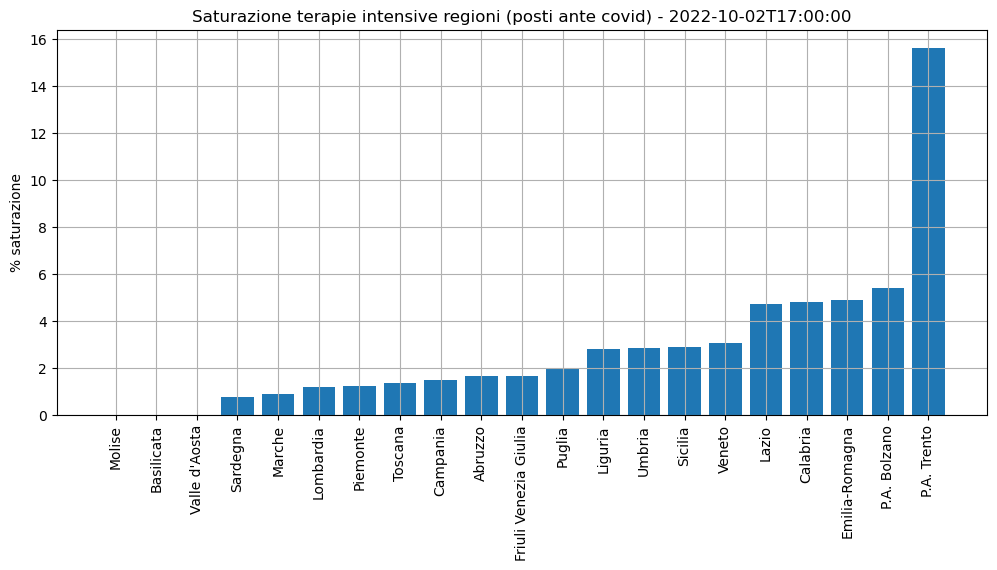

In [18]:
valori=np.array([100*trend['terapia_intensiva'][r][-1]/posti_ti_antecovid[r] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Saturazione terapie intensive regioni (posti ante covid) - %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('% saturazione')
plt.grid()
plt.show()


Posti **STIMATI COVID**

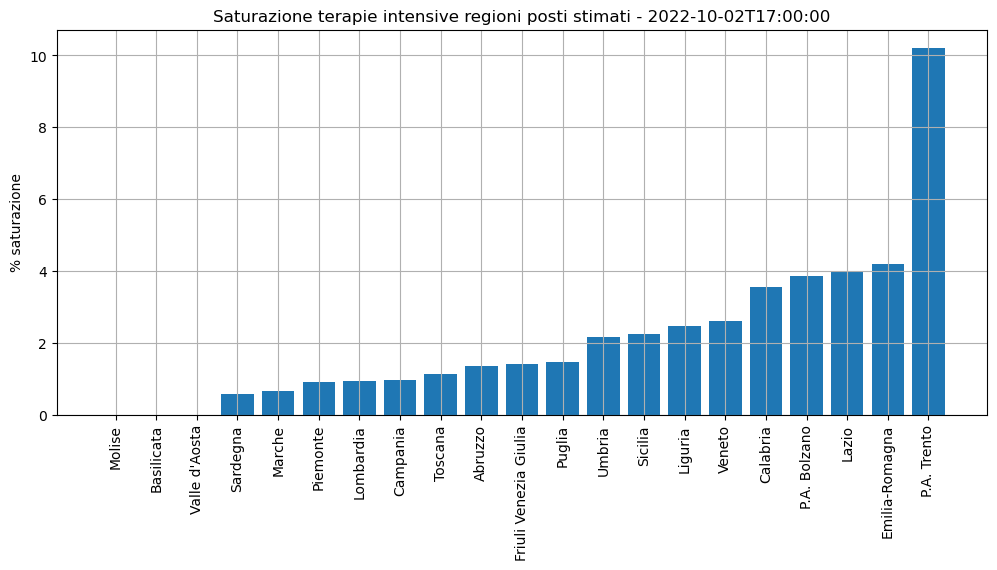

In [19]:
valori=np.array([100*trend['terapia_intensiva'][r][-1]/posti_ti_stimati[r] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Saturazione terapie intensive regioni posti stimati - %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('% saturazione')
plt.grid()
plt.show()


### Ospadalizzati nelgi ultimi giorni

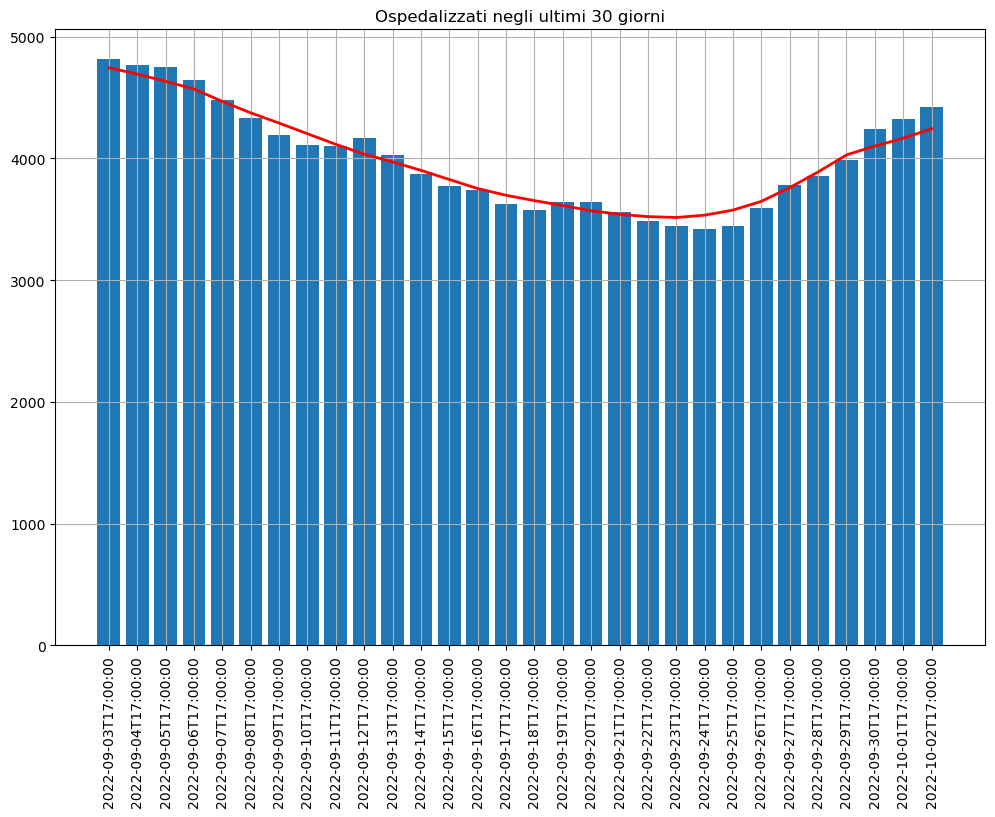

In [20]:
ultimi_giorni=30
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Ospedalizzati negli ultimi %d giorni'%ultimi_giorni)
plt.bar(range(ultimi_giorni),trend['totale_ospedalizzati']['Italia'][-ultimi_giorni:])
plt.plot(range(ultimi_giorni),moving_function_rev1(trend['totale_ospedalizzati']['Italia'][-ultimi_giorni:],np.mean,3,3),'r',linewidth=2)
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
#plt.ylabel('Variazione')
plt.show()

### Terapia intensiva negli ultimi giorni

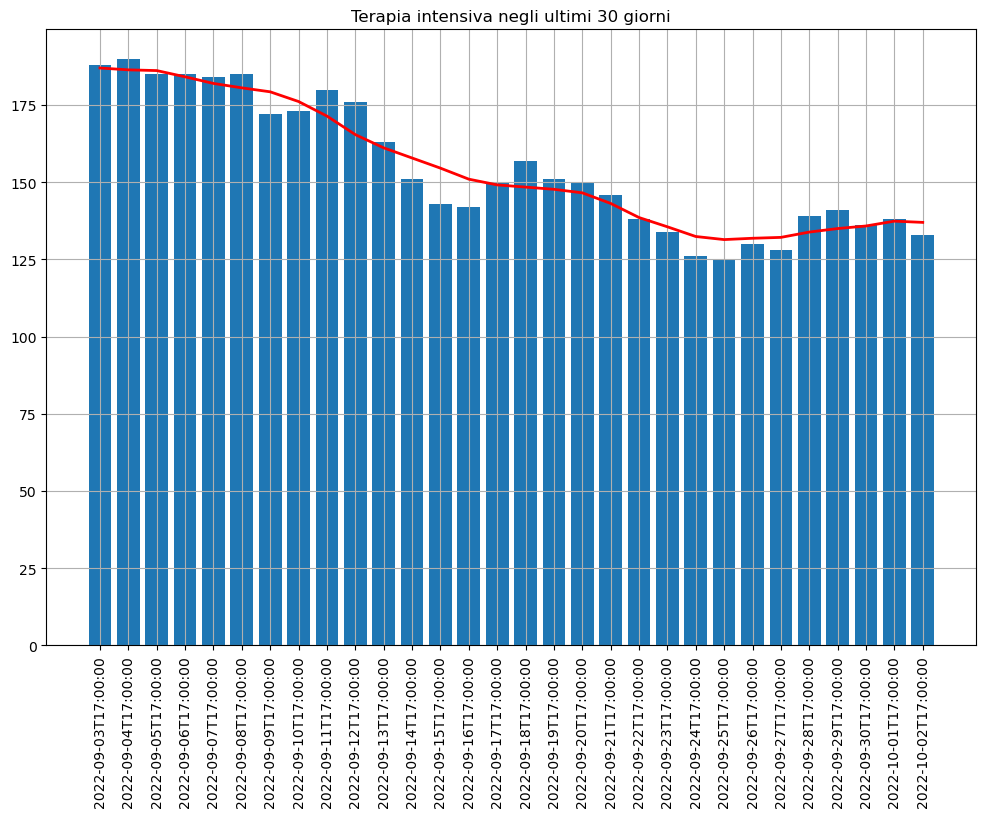

In [21]:
ultimi_giorni=30
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Terapia intensiva negli ultimi %d giorni'%ultimi_giorni)
plt.bar(range(ultimi_giorni),trend['terapia_intensiva']['Italia'][-ultimi_giorni:])
plt.plot(range(ultimi_giorni),moving_function_rev1(trend['terapia_intensiva']['Italia'][-ultimi_giorni:],np.mean,3,3),'r',linewidth=2)
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
#plt.ylabel('Variazione')
plt.show()

### Variazione terapia intensiva

In [22]:
variazione_TI_italia=np.diff(trend['terapia_intensiva']['Italia'])

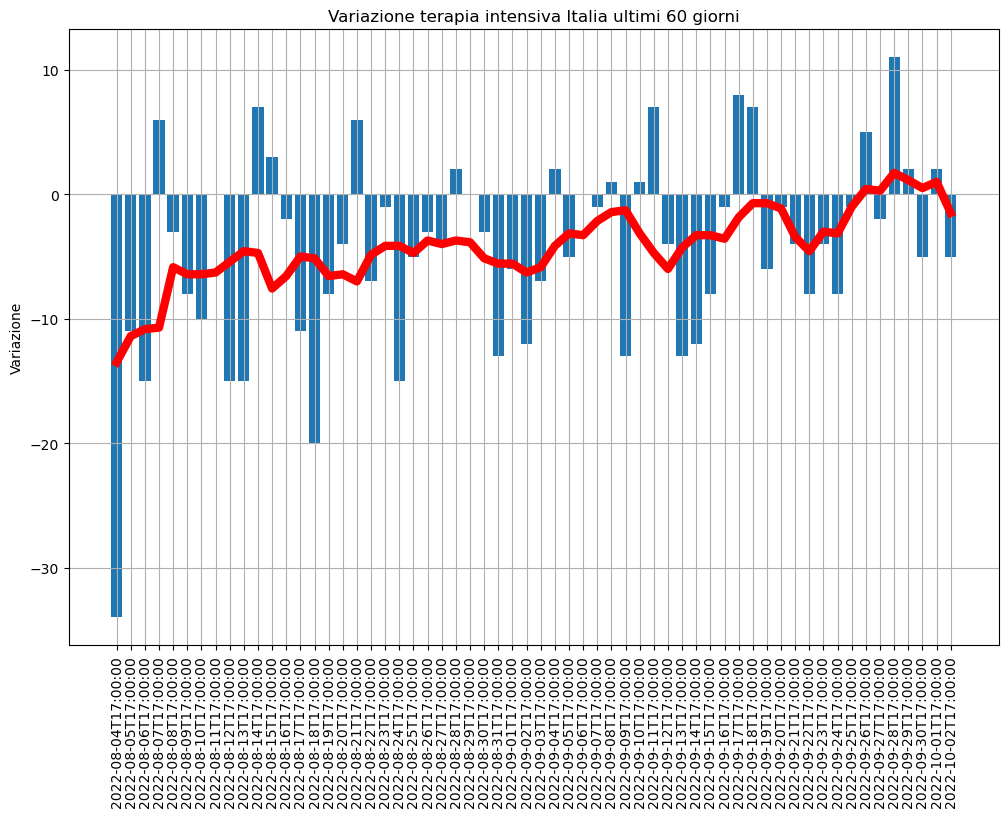

In [23]:
ultimi_giorni=60
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Variazione terapia intensiva Italia ultimi %d giorni'%ultimi_giorni)
plt.bar(range(ultimi_giorni),variazione_TI_italia[-ultimi_giorni:])
plt.plot(range(ultimi_giorni),moving_function_rev1(variazione_TI_italia[-ultimi_giorni:],np.mean,3,3),'r',linewidth=6)
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.ylabel('Variazione')
plt.show()

### Variazione ospedalizzati

In [24]:
variazione_OSP_italia=np.diff(trend['totale_ospedalizzati']['Italia'])

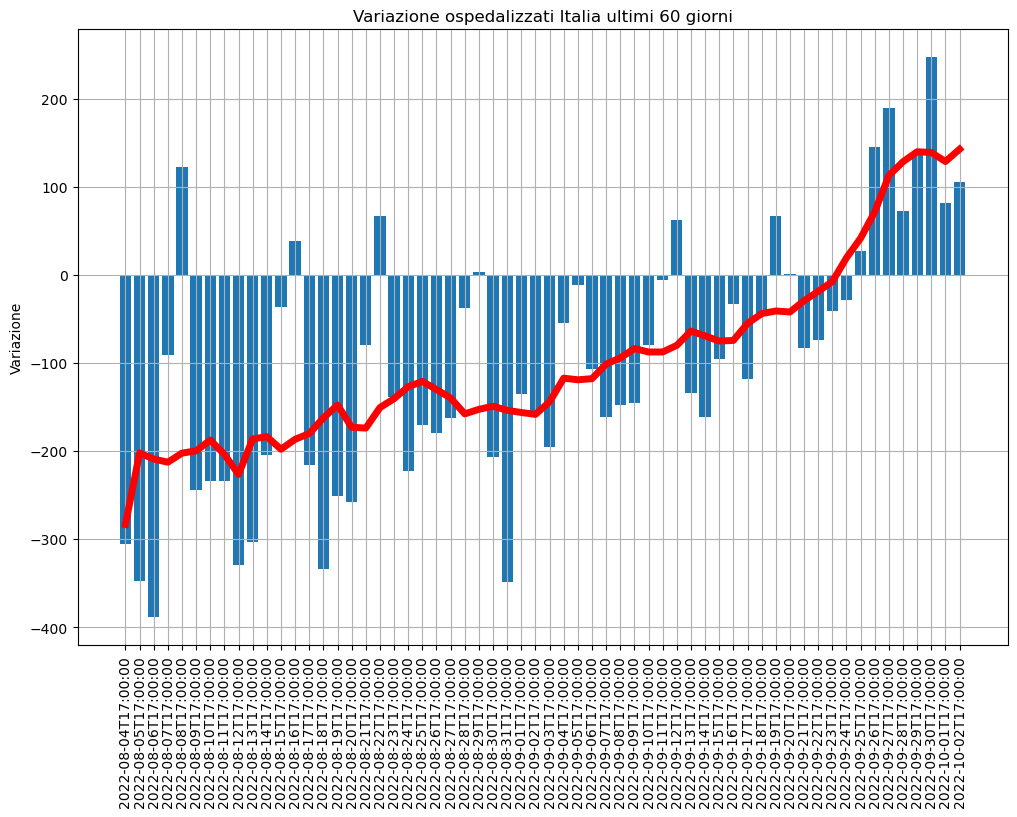

In [25]:
ultimi_giorni=60
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Variazione ospedalizzati Italia ultimi %d giorni'%ultimi_giorni)
plt.bar(range(ultimi_giorni),variazione_OSP_italia[-ultimi_giorni:])
plt.plot(range(ultimi_giorni),moving_function_rev1(variazione_OSP_italia[-ultimi_giorni:],np.mean,3,3),'r',linewidth=5)
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.ylabel('Variazione')
plt.show()

## Distribuzione ospedalizzati nel tempo

In [26]:
categories=['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare']
values=[trend[c]['Italia'] for c in categories]
values=np.array(values)

values.shape

(3, 952)

### Trend scatter plot

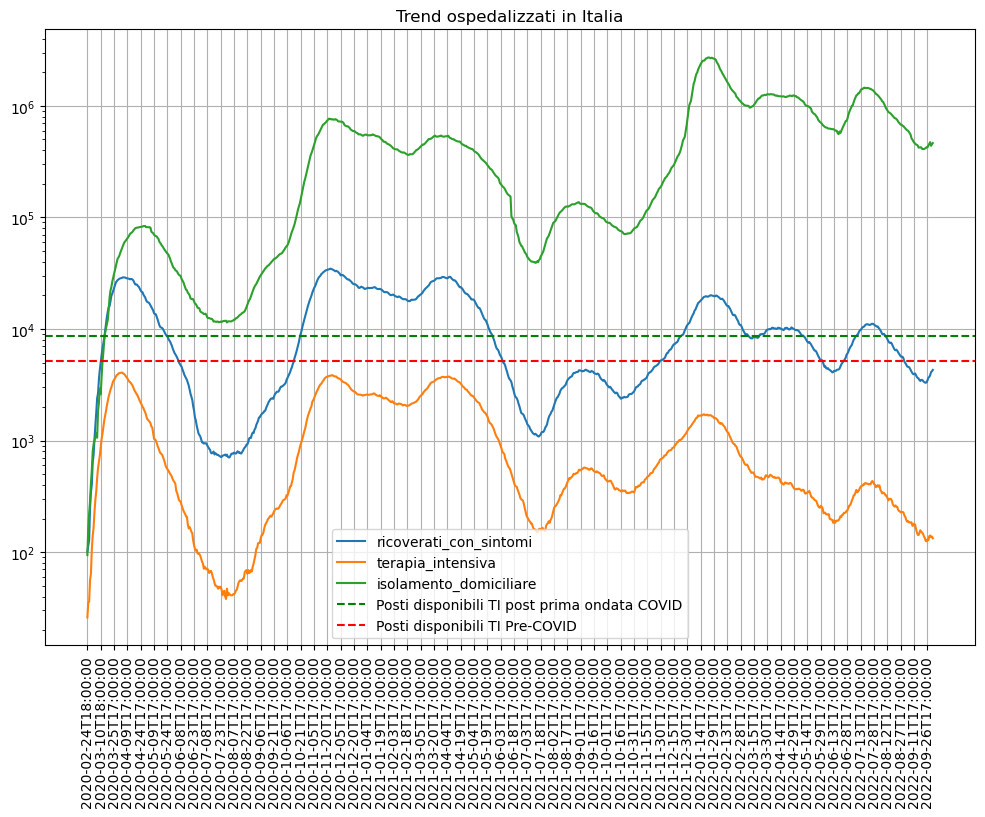

In [27]:
plt.figure(figsize=(12,8))
plt.yscale('log')
for indicatore in categories:
    plt.plot(day_counter,trend[indicatore]['Italia'],'-',label=indicatore)

plt.grid()
plt.title('Trend ospedalizzati in Italia')
plt.xticks(list(range(0,len(giorni),15)),giorni[list(range(0,len(giorni),15))],rotation=90)

#plt.axvline(x=lockdown['id_giorno'],c='r', label='Lockdown',linewidth=4,ls='--')
#plt.axvline(x=scuole_chiuse['id_giorno'],c='c', label='Scuole chiuse',linewidth=4,ls='--')
#plt.axvline(x=fase_2['id_giorno'],c='g', label='Fase 2',linewidth=4,ls='--')

plt.axhline(posti_ti_covid['Italia'],c='g',ls='--',label='Posti disponibili TI post prima ondata COVID')
plt.axhline(posti_ti_antecovid['Italia'],c='r',ls='--',label='Posti disponibili TI Pre-COVID')

plt.legend()
plt.show()

## Path plots

In [28]:
# creo DF

label_giorni=[g[0:10] for g in giorni]

ricoveriDF = pd.DataFrame((label_giorni,day_counter,
                        trend['totale_positivi']['Italia'],
                         trend['totale_ospedalizzati']['Italia'])).transpose()
ricoveriDF.columns = ('Data', 'DayCount','TotPos', 'TotOsp')

ricoveriDF


,Data,DayCount,TotPos,TotOsp
0,2020-02-24,0,221.0,127.0
1,2020-02-25,1,311.0,149.0
2,2020-02-26,2,385.0,164.0
3,2020-02-27,3,588.0,304.0
4,2020-02-28,4,821.0,409.0
...,...,...,...,...
947,2022-09-28,947,459373.0,3854.0
948,2022-09-29,948,476145.0,3990.0
949,2022-09-30,949,441944.0,4237.0
950,2022-10-01,950,456149.0,4319.0


In [29]:
numdays=365

regione='Italia'
varx='terapia_intensiva'
vary='totale_positivi'

fig = go.Figure()

fig.add_trace(go.Scatter(y=trend[vary][regione][-numdays:],
                         x=trend[varx][regione][-numdays:],
                         hovertext=giorni[-numdays:],
                         mode='markers',
                         marker=dict(
    size=12,
    color=max(day_counter)-np.array(day_counter)[-numdays:],
    colorscale='viridis',
    colorbar=dict(title='Days ago'),
    showscale=True)))

fig.update_layout(
    title='%s e %s negli ultimi %d giorni in %s' % (varx, vary, numdays,regione),
    xaxis_title=varx,
    yaxis_title=vary,
    autosize=False,
    showlegend=False,
    width=900,
    height=600
)

fig.show()
